# Imports and Loading the Network

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

The graph is loaded from the `sbb.edgelist`.
Make sure to create this edgelist through the `create_edgelist.py` script.

In [2]:
G = nx.read_edgelist("data/sbb.edgelist", delimiter=";", create_using=nx.Graph)

# 1. Network Exploration

In [3]:
print(f"number of nodes: {len(G.nodes)}")
print(f"number of edges: {len(G.edges)}")

number of nodes: 3152
number of edges: 4678


## Degrees: Minimum and Maximum

In [4]:
degrees = dict(G.degree())

sorted_degrees = sorted(degrees.items(), key=lambda x: x[1])

In [5]:
# min degree
min_degree = sorted_degrees[0]
print(f"Minimum degree: {min_degree[0]} with degree {min_degree[1]}")

# max degree
max_degree = sorted_degrees[-1]
print(f"Maximum degree: {max_degree[0]} with degree {max_degree[1]}")

# top 10 min degree
bottom10_min_degree = sorted_degrees[0:10]

# top 10 max degree
top10_max_degree = sorted_degrees[-10:]

print(f"Top 10 degree: {top10_max_degree}")
print(f"Bottom 10 degrees: {bottom10_min_degree}")

min_degree_nodes = [k for (k, v) in sorted_degrees if v == 1]
print("Number of stations with degree of 1:", len(min_degree_nodes))

Minimum degree: Laufenburg with degree 1
Maximum degree: Lyon Part Dieu with degree 40
Top 10 degree: [('Winterthur', 19), ('Nancy', 20), ('Luzern', 21), ('Dijon', 22), ('Paris Gare de Lyon', 24), ('Olten', 25), ('Bern', 27), ('Strasbourg', 27), ('Zürich HB', 36), ('Lyon Part Dieu', 40)]
Bottom 10 degrees: [('Laufenburg', 1), ('Genève-Aéroport', 1), ('Zürich HB SZU', 1), ('Uetliberg', 1), ('Milano Porta Garibaldi', 1), ('Orbe', 1), ('Ste-Croix', 1), ('St. Urban Ziegelei', 1), ('Einsiedeln', 1), ('Menziken', 1)]
Number of stations with degree of 1: 123


## Centrality Measures

### Betweeness Centrality

The node that acts as a bridge, broker or gatekeeper.

In [6]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
sorted_betweeness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

In [7]:
num = 10

top_betweenness_centrality = sorted_betweeness_centrality[0:num]
bottom_betweenness_centrality = sorted_betweeness_centrality[-num:]

print(f"Top {num} betweeness centrality score: {top_betweenness_centrality}")
print(f"Bottom {num} betweness centrality score: {bottom_betweenness_centrality}")

# find all nodes w a betweenness centrality of 0?
min_centrality_nodes = [k for (k, v) in sorted_betweeness_centrality if v == 0]
print("Rural stations:", len(min_centrality_nodes))

Top 10 betweeness centrality score: [('Zürich HB', 0.3965608849545719), ('Basel SBB', 0.3477097260552382), ('Mulhouse', 0.31792958062710336), ('Paris Gare de Lyon', 0.18767466843442826), ('Bern', 0.1718813022347316), ('Lyon Part Dieu', 0.15119813209264302), ('Strasbourg', 0.14122656309415257), ('Lausanne', 0.13583892771717548), ('Olten', 0.12458703383188358), ('Dijon', 0.0934635591297922)]
Bottom 10 betweness centrality score: [('Fismes', 0.0), ('Saint-Claude', 0.0), ('Böblingen', 0.0), ('Dettenhausen', 0.0), ('Heimerdingen', 0.0), ('Korntal', 0.0), ('Rudersberg-Oberndorf', 0.0), ('Schorndorf', 0.0), ('Neuffen', 0.0), ('Nürtingen', 0.0)]
Rural stations: 554


### Closeness Centrality

A central node is one that is close on average to every other nodes.

In [8]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

In [9]:
num = 10

top_closeness_centrality = sorted_closeness_centrality[0:num]
bottom_closeness_centrality = sorted_closeness_centrality[-num:]

print(f"Top {num} closeness centrality score: {top_closeness_centrality}")
print(f"Bottom {num} closeness centrality score: {bottom_closeness_centrality}")

# find all nodes w a closeness centrality of 0?
min_closeness_nodes = [k for (k, v) in sorted_closeness_centrality if v < 0.001]
print("Rural stations:", len(min_closeness_nodes))

Top 10 closeness centrality score: [('Zürich HB', 0.1482759195713147), ('Basel SBB', 0.1456206556766508), ('Olten', 0.1435782292914516), ('Mulhouse', 0.1420661357349373), ('Zürich Altstetten', 0.14072262250823464), ('Bern', 0.13807078047321245), ('Basel Bad Bf', 0.13736777911653228), ('Thun', 0.13547887545212717), ('Saint-Louis (Haut-Rhin)', 0.13532010866422564), ('Paris Gare de Lyon', 0.13493427494315816)]
Bottom 10 closeness centrality score: [('Böblingen', 0.0005818258753834761), ('Dettenhausen', 0.0005818258753834761), ('Rudersberg-Oberndorf', 0.0005712472231037767), ('Schorndorf', 0.0005712472231037767), ('Heimerdingen', 0.0005440449743845491), ('Korntal', 0.0005440449743845491), ('Neuffen', 0.0005440449743845491), ('Nürtingen', 0.0005440449743845491), ('Pied du barrage', 0.00031735956839098697), ('Les Montuires', 0.00031735956839098697)]
Rural stations: 65


### Adamic-Adar 

This measure refines the simple counting of vertex similarity by weighting less-connected neighbors more heavily.

For example, two users on a social media who are friends with a famous person are (probably) less similar than those who are friends with a less famous person.

In [10]:
from itertools import combinations

perms = list(combinations(G.nodes, 2))
preds = nx.adamic_adar_index(G, perms)

min_sim = np.inf
min_tuple = []
max_sim = 0
max_tuple = []

for u, v, p in preds:
    if p < min_sim:
        min_sim = p
        min_tuple = [u,v]
    elif p > max_sim:
        max_sim = p
        max_tuple = [u,v]
        
print(f"Minimum similarity:{min_tuple} with {min_sim}")
print(f"maximum similarity:{max_tuple} with {max_sim}")

Minimum similarity:['Luzern', 'Cham Alpenblick'] with 0
maximum similarity:['Olten', 'Aarau'] with 4.135539724611721


# Graph Visualization

Visualization of the graph with networkx and geopandas on top of a map of Switzerland.

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from contextily import add_basemap, providers

In [12]:
gdf = gpd.read_file("data/swiss-boundaries.gkpg")
gdf["geometry"] = gdf["geometry"].simplify(0.5) 

gdf = gdf.to_crs(epsg=3857)
df = gpd.read_file('data/stations.geojson')
df = df.to_crs(epsg=3857)

coordinates = np.column_stack((df["geometry"].x, df["geometry"].y))
positions = dict(zip(G.nodes, coordinates))

## Node Color and Size Setup

In [13]:
node_color = [40 * x for x in closeness_centrality.values()]
node_size = [1500 * x for x in betweenness_centrality.values()]

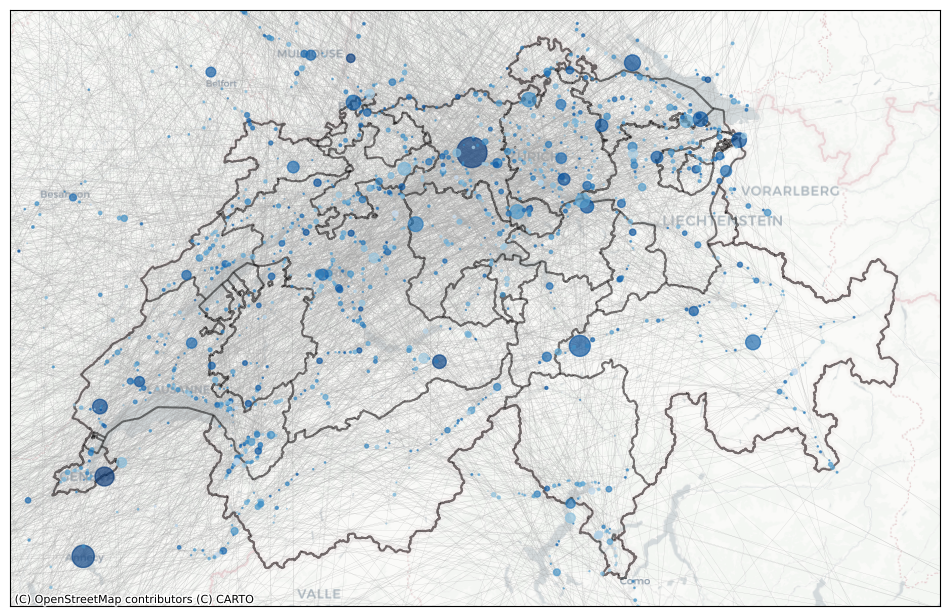

In [14]:
ax = gdf[gdf["typ"] != "k_W"].plot(figsize=(12, 12), alpha=0.5, edgecolor="k")
add_basemap(ax, source=providers.CartoDB.Positron)

nx.draw_networkx(G, positions, ax=ax, with_labels=False, 
                node_color=node_color, node_size=node_size, cmap="Blues", alpha=0.66,
                edge_color="darkgrey",  width=0.15
)
plt.show()